# EXPLORATORY DATA ANALYSIS. 

In this course I perfornmed exploratory data analysis on the weather data provided in week one. This helped me understand the data more by uncovering hidden patterns, insights and potential defects that may hinder decision making process. As an an aspiring spatial data scientinst, EDA is a crucial step as it directly influences the quality of information generated from machine learning models and deep learning algorithms. 


## 1. Data Overview and Cleaning. 

After data colliction, the first step is understanding the features and characteristics in data through variables present in our dataset. Identifying key attributes that will have the maximum impact on our outcome is key. Unnecessary information i.e. duplicates, null values, outliers and anomalies need to be removed, this will save you a ton of time during computation, subsequently improving the quality of final results.  


In [1]:
# Import modules required and import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset 

data = pd.read_csv('../Data/1. Weather Data.csv')

# Head and tail 
print(f'Head sample :\n {data.head(5)} \n\n Tail sample : \n{data.tail(5)}')

Head sample :
        Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog   

 Tail sample : 
             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4  

In [4]:
# Analysing data 

# 1. Features(columns) and observation(rows) presents in the dataset
print(f'Number of rows and columns : {data.shape}')


Number of rows and columns : (8784, 8)


In [5]:
# 2. Column data type and associated information such as missing data, 

print(f'Column data types : {data.info()} \n\n')

# Check missing data 
print(f'Sum of missing information in each column : \n {data.isnull().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
Column data types : None 


Sum of missing information in each column : 
 Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [3]:
# Columns to list 
# Sometimes you would need to easi;ly access the colums either for further manipulation or 
# any other purpose. Python provides a convinient way of bundling them together into a list 
 
features_lst = data.columns.tolist()
features_lst

['Date/Time',
 'Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa',
 'Weather']

In [9]:
# Convert date time column from object/string to datetimer format 

# convert the 'Date' column to datetime format
data['Date/Time']= pd.to_datetime(data['Date/Time'])

# Check the format of 'Date' column
print(data.info())

# Check date column sample 

print(f'\n\n Sample head of date column : \n {data['Date/Time'].head(4)}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB
None


 Sample head of date column : 
 0   2012-01-01 00:00:00
1   2012-01-01 01:00:00
2   2012-01-01 02:00:00
3   2012-01-01 03:00:00
Name: Date/Time, dtype: datetime64[ns]


In [12]:
# Duplicates 

# Find unique values ain each column 
print(f'Unique values in each column : \n {data.nunique()} \n')


# find duplicate rows across all columns
# Since we dont have a column that uniquely identifies each observation , we can find values that 
# have duplicates across the columns meaning that each column value are similar 
duplicateRows = data[data.duplicated()]

print(f' Rows with similar column data : \n {duplicateRows}')

Unique values in each column : 
 Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64 

 Rows with similar column data : 
 Empty DataFrame
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather]
Index: []


## 2. Statistical Summary.

Statistical summary offers a quick and insightfull view of the dataset by giving the mean, standard devition, minimum value, maximum value, percentiles and other key information about each column. 

### 2.1. Statistics. 

In [13]:
# Desription includes vital statistics for each numeric column
print(f'Key description metrics of data columns : \n {data.describe()} \n\n')


# Finding values for specific columns i.e mean, mode, median 
mean_temp = data.Temp_C.mean()
mode_hum = data['Rel Hum_%'].mode().iloc[0]
md_speed = data['Wind Speed_km/h'].median()
print(f'Mean temprature : {mean_temp} \n Most occuring humidity value : {mode_hum} \n\
      Median wind speed : {md_speed}')

Key description metrics of data columns : 
                  Date/Time       Temp_C  Dew Point Temp_C    Rel Hum_%  \
count                 8784  8784.000000       8784.000000  8784.000000   
mean   2012-07-01 23:30:00     8.798144          2.555294    67.431694   
min    2012-01-01 00:00:00   -23.300000        -28.500000    18.000000   
25%    2012-04-01 11:45:00     0.100000         -5.900000    56.000000   
50%    2012-07-01 23:30:00     9.300000          3.300000    68.000000   
75%    2012-10-01 11:15:00    18.800000         11.800000    81.000000   
max    2012-12-31 23:00:00    33.000000         24.400000   100.000000   
std                    NaN    11.687883         10.883072    16.918881   

       Wind Speed_km/h  Visibility_km    Press_kPa  
count      8784.000000    8784.000000  8784.000000  
mean         14.945469      27.664447   101.051623  
min           0.000000       0.200000    97.520000  
25%           9.000000      24.100000   100.560000  
50%          13.000000  

In [14]:
# Correlation between variables 
# Measure the strength and direction of linear relationship between numeric variables 

# Filter numeric variables 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = data.select_dtypes(include=numerics)

# Create a correlation matrix 
corr = newdf.corr()
corr

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


### 2.2. Outliers.

An outlier is an object that deviates significantly from the rest/normal ones. Identifying them is important in stattistics since they can distort/skew analysis. Outliers can be detected using visualisations, i.e. a boxplot. Using a boxplot and whiskers, it summarises the data effectively and efficiently with quartiles(25th, 75th items), median(50th), and outliers.  

<center><img src="../Data/boxplot_figure.png" width=600px height=300px /></center>

In [15]:
# Add numeric features to a list 

features_lst = newdf.columns.tolist()
features_lst

['Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa']

<Axes: ylabel='Temp_C'>

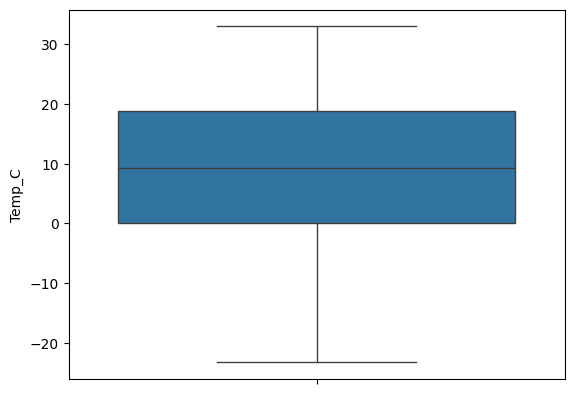

In [16]:
# Visualise temprature column with boxplot.

sns.boxplot(data['Temp_C'])

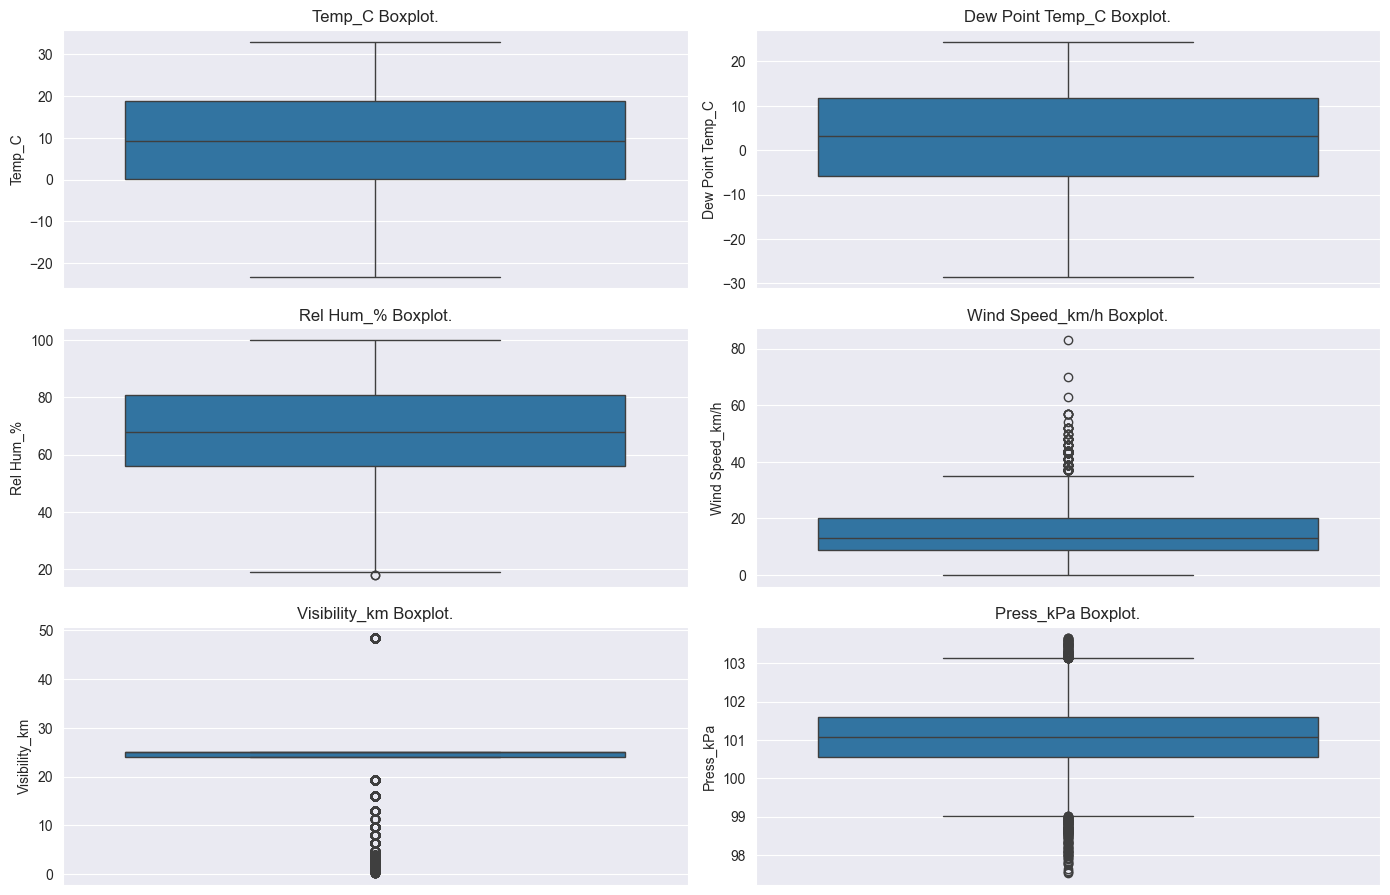

In [17]:
# Visualise all the features in question with boxplot.

# Set Seaborn style
sns.set_style("darkgrid")

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(features_lst) * 3))
for idx, feature in enumerate(features_lst, 1):
    plt.subplot(len(features_lst), 2, idx)
    sns.boxplot(data[feature])
    plt.title(f"{feature} Boxplot.")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

From the figure above, there are three columns with most outliers, they are wind speed, visibility, and pressure. Outliers are visulised with dots. In wind speed, values greater than 40 are outliers.

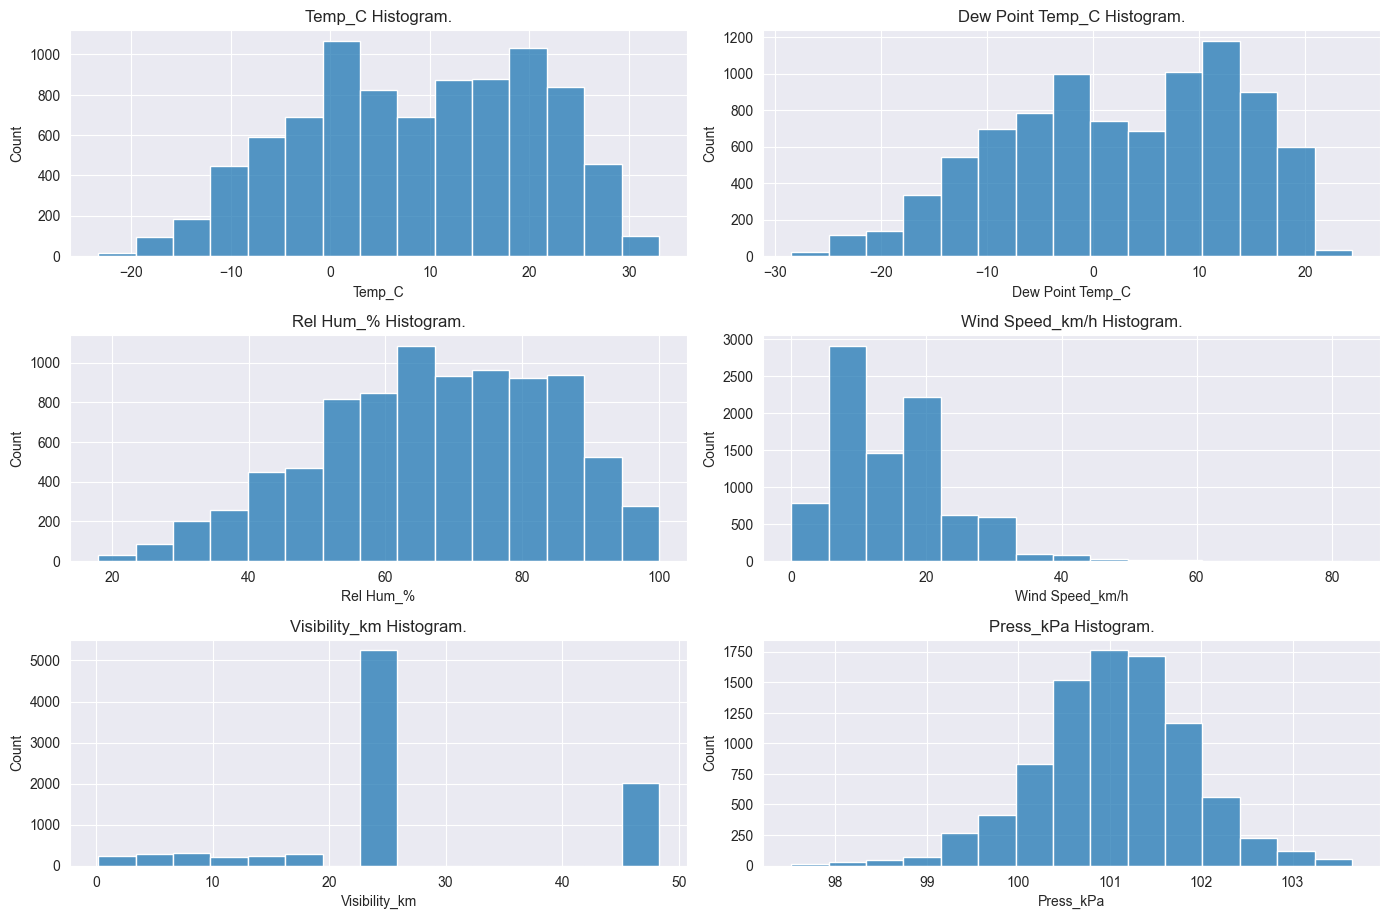

In [19]:
# Plot histogram of each numerical variable 

# Set Seaborn style
sns.set_style("darkgrid")

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(features_lst) * 3))
for idx, feature in enumerate(features_lst, 1):
    plt.subplot(len(features_lst), 2, idx)
    sns.histplot(data[feature], bins=15, kde=False)
    plt.title(f"{feature} Histogram.")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


### 2.3. Dealing with outliers.

There are many ways of dealing with outliers, each is suitable with your type of data. Outlier can be eliminated but one runs the risk of narrowing the data especially with small datasets. Alternatively, in our case we will use log transformation to reduce skewdness and try to make it normal. As observed in the figure above, most feature with ouliers have a skewed distribution where data is unevenly distributed with weight to left or right, only pressure variable seem to have an even distribution. One should note that log transformation changes the values of data. 

### 2.3.1. Log transformation.

In [20]:
# Tranform features with log.

# Create a copy of the data 
data_copy = data.copy(deep=True)
data_copy


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [21]:
# Loop through numerical columns and apply transformation

# Columns to be transformed 
cols = ['Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
for column in cols:
    data_copy[column] = np.log10(data_copy[column])

data_copy

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,1.934498,0.602060,0.903090,2.005352,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,1.939519,0.602060,0.903090,2.005352,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,1.949390,0.845098,0.602060,2.005438,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,1.944483,0.778151,0.602060,2.005481,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,1.944483,0.845098,0.681241,2.005309,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,1.908485,1.477121,0.986772,2.000564,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,1.919078,1.380211,0.986772,2.000130,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,1.968483,1.447158,0.681241,1.999783,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,1.949390,1.447158,0.986772,1.999609,Snow


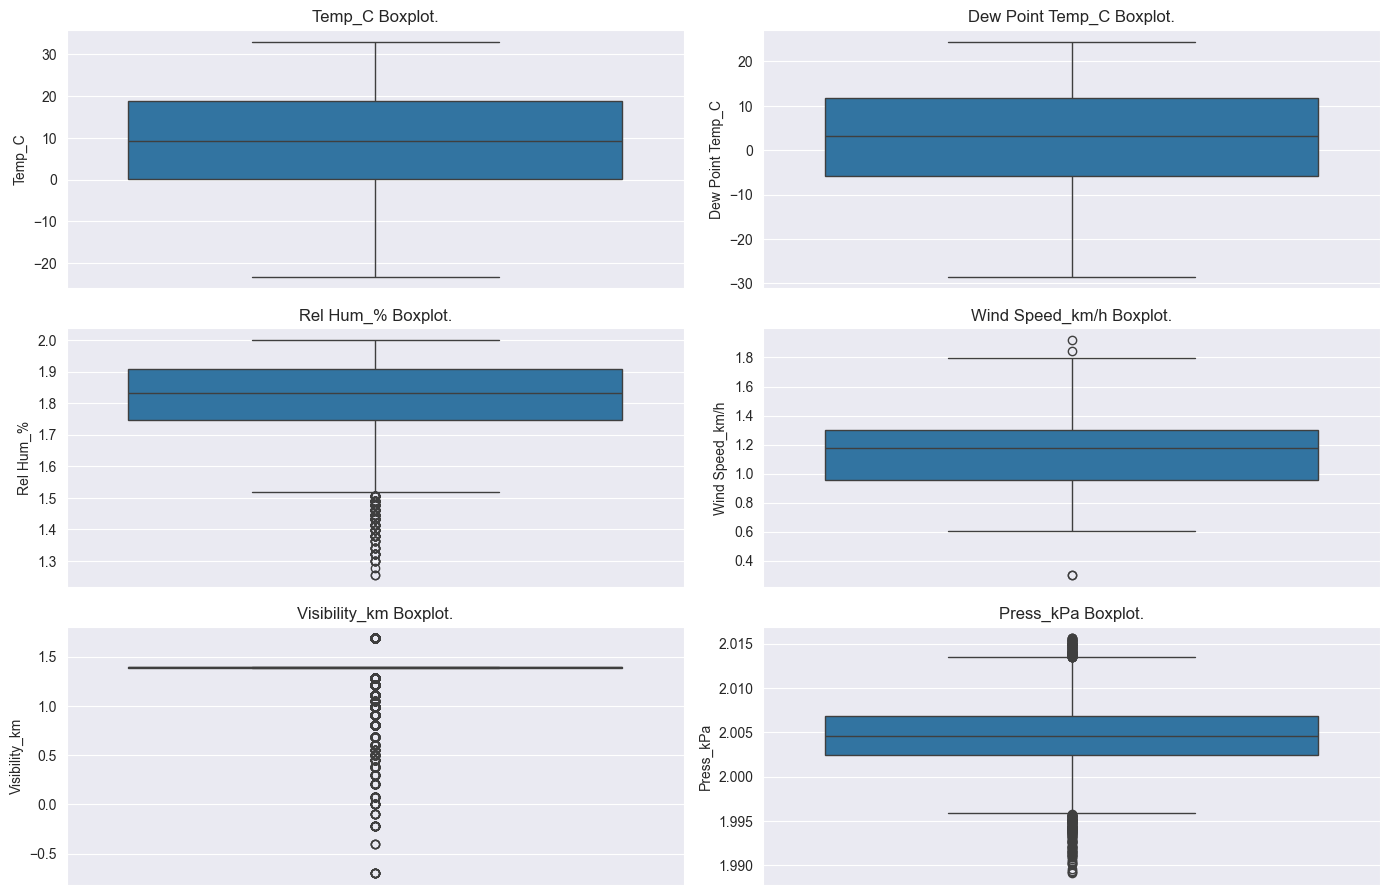

In [22]:
# Visualise all the features in question with boxplot.

# get numeric data columns
newdf_2 = data_copy.select_dtypes(include=numerics)
features_lst_2 = newdf_2.columns.tolist()

# Set Seaborn style
sns.set_style("darkgrid")

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(features_lst_2) * 3))
for idx, feature in enumerate(features_lst_2, 1):
    plt.subplot(len(features_lst_2), 2, idx)
    sns.boxplot(data_copy[feature])
    plt.title(f"{feature} Boxplot.")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

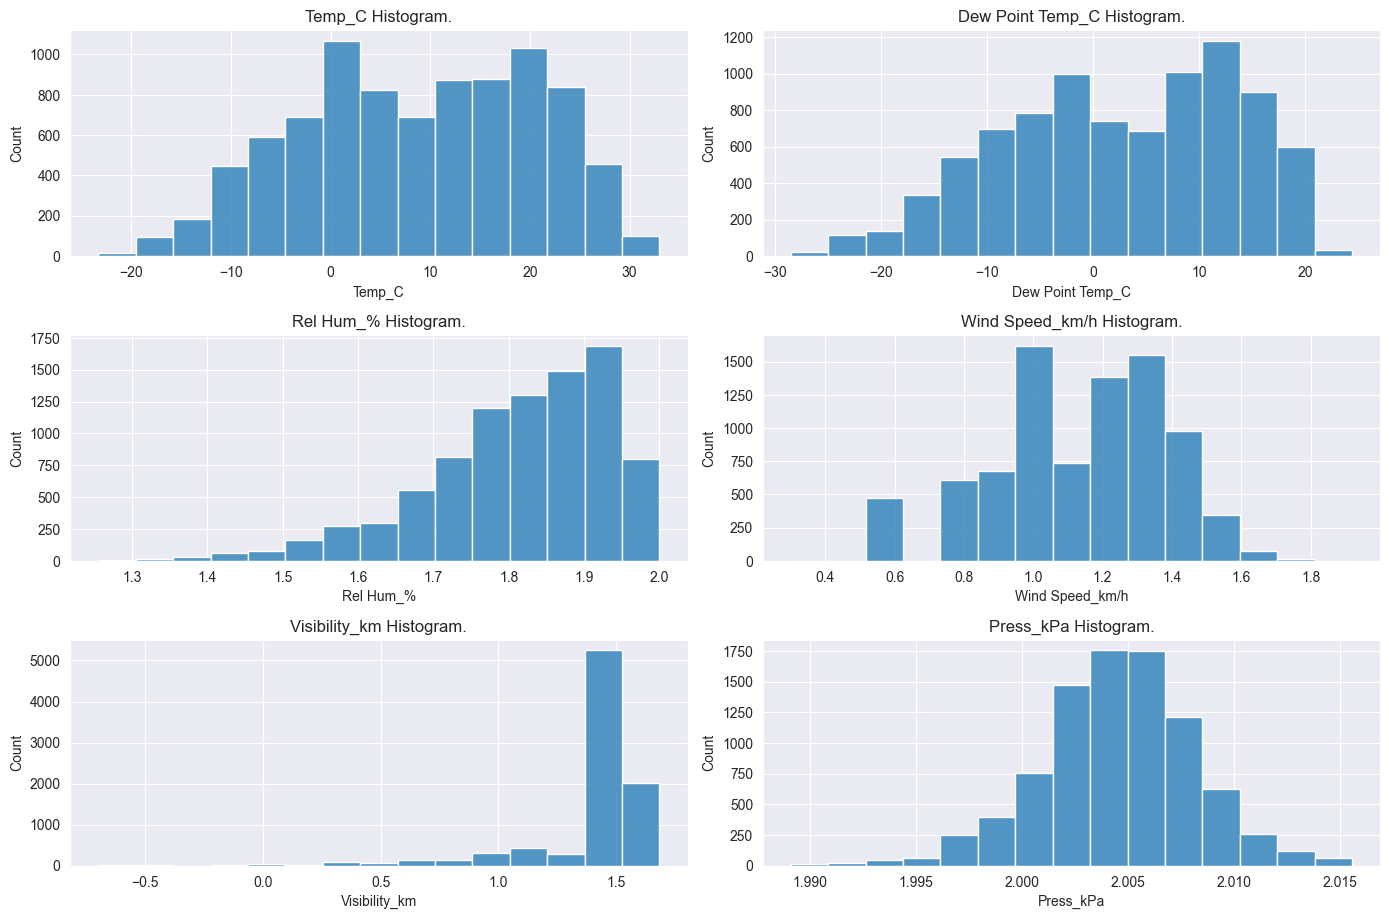

In [23]:
# Plot histogram of each numerical variable 

# Set Seaborn style
sns.set_style("darkgrid")

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(features_lst_2) * 3))
for idx, feature in enumerate(features_lst_2, 1):
    plt.subplot(len(features_lst_2), 2, idx)
    sns.histplot(data_copy[feature], bins=15, kde=False)
    plt.title(f"{feature} Histogram.")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### 2.3.2. Removing Outliers. 

Looking at the figure above, log transformation did not have the intended effect on out data, some feature are still skewed. We can as well resort to removing those observations from the data. 

Before handling outliers, we will detect them. We will use Tukey’s rule to detect outliers. It is also known as the IQR rule. First, we will calculate the Interquartile Range of the data (IQR = Q3 — Q1). Later, we will determine our outlier boundaries with IQR.

We will get our lower boundary with this calculation Q1–1.5 * IQR. We will get our upper boundary with this calculation Q3 + 1.5 * IQR.

According to this rule, the data between boundaries are acceptable but the data outside of the between lower and upper boundaries are outliers. We can use 2.5 or 2 to detect IQR. It depends on our data and analysis. But the most commonly used is 1.5 and we will use 1.5 IQR in this analysis.

In [25]:
# Identify outliers using IQR method in data containing numerical variables

# Calculate the interquartile range (IQR) for each column in data with numeric variables 
Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for identifying outliers
threshold = 1.5

# Identify outliers by comparing values with the threshold
outliers = newdf[(newdf < (Q1 - threshold * IQR)) | (newdf > (Q3 + threshold * IQR))]

# Print the outliers
print(outliers)



      Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0        NaN               NaN        NaN              NaN            8.0   
1        NaN               NaN        NaN              NaN            8.0   
2        NaN               NaN        NaN              NaN            4.0   
3        NaN               NaN        NaN              NaN            4.0   
4        NaN               NaN        NaN              NaN            4.8   
...      ...               ...        ...              ...            ...   
8779     NaN               NaN        NaN              NaN            9.7   
8780     NaN               NaN        NaN              NaN            9.7   
8781     NaN               NaN        NaN              NaN            4.8   
8782     NaN               NaN        NaN              NaN            9.7   
8783     NaN               NaN        NaN              NaN           11.3   

      Press_kPa  
0           NaN  
1           NaN  
2           NaN  
3  

In [26]:
# Remove outliers by replacing them with NaN
newdf[(newdf < (Q1 - threshold * IQR)) | (newdf > (Q3 + threshold * IQR))] = pd.NA

# Drop rows containing NaN values
newdf_3 = newdf.dropna()

# Print the DataFrame after removing outliers
print(newdf_3)

      Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
20       3.2               1.3       87.0             19.0           25.0   
21       4.0               1.7       85.0             20.0           25.0   
23       5.3               2.0       79.0             30.0           25.0   
24       5.2               1.5       77.0             35.0           25.0   
26       3.9              -0.9       71.0             32.0           25.0   
...      ...               ...        ...              ...            ...   
8762   -10.1             -13.4       77.0              9.0           25.0   
8763   -11.8             -14.4       81.0              6.0           25.0   
8764   -10.5             -12.8       83.0             11.0           25.0   
8765   -10.2             -12.4       84.0              6.0           25.0   
8766    -9.7             -11.7       85.0              4.0           25.0   

      Press_kPa  
20        99.50  
21        99.39  
23        99.31  
24 

In [29]:
# Study the effects of droping  missing data 

# Percentage of data droped 
per_removed = ((len(data) - len(newdf_3)) / len(data)) * 100
per_removed

42.29280510018215

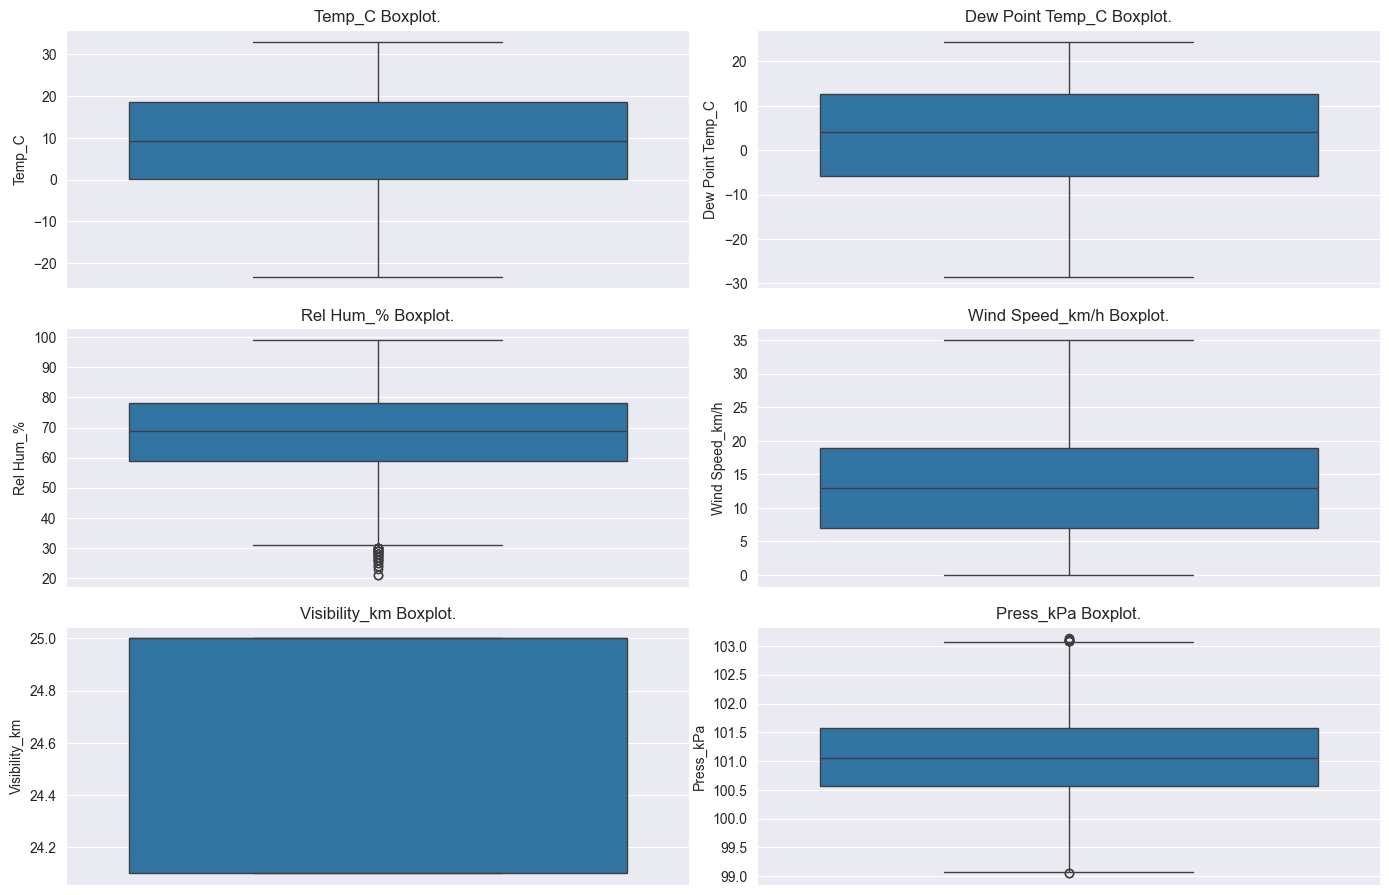

In [30]:
# Plot new distribution 

# Set Seaborn style
sns.set_style("darkgrid")

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(features_lst) * 3))
for idx, feature in enumerate(features_lst, 1):
    plt.subplot(len(features_lst), 2, idx)
    sns.boxplot(newdf_3[feature])
    plt.title(f"{feature} Boxplot.")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

The new dataframe has been cleaned and outliers removed but a whoping 42% of the data was whipped out, this can significantly impact on our model and statistical analysis. 

## 3. Data Visualisation. 